### 1. Import the required libraries and read the data

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv(r"E:\Apps_data.csv")

In [3]:
# Checking the first few Samples of the dataset

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking the Shape and Size of the dataset

def shapeSize(df):
    print(f"The shape of the dataset is: {df.shape}")
    print(f"The size of the dataset is: {df.size}")

shapeSize(df)

The shape of the dataset is: (10841, 13)
The size of the dataset is: 140933


In [5]:
# Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 2. Data cleansing and Exploratory data analysis

In [6]:
# Checking summary statistics of numerical dataset

def numericalSummary(df):
    print("Statistical summary for Numerical columns.")
    return df.describe().T

numericalSummary(df)

Statistical summary for Numerical columns.


,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [7]:
# Checking the Statistical Summary for Categorical Columns

def categoricalSummary(df):
    categorical_columns = df.select_dtypes(include = ['object']).columns
    print("Statistical Summary for Categorical Columns: \n")
    for col in categorical_columns:
        print(f"Column: {col}\n{df[col].describe()}\n")

categoricalSummary(df)

Statistical Summary for Categorical Columns: 

Column: App
count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

Column: Category
count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

Column: Reviews
count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

Column: Size
count                  10841
unique                   462
top       Varies with device
freq                    1695
Name: Size, dtype: object

Column: Installs
count          10841
unique            22
top       1,000,000+
freq            1579
Name: Installs, dtype: object

Column: Type
count     10840
unique        3
top        Free
freq      10039
Name: Type, dtype: object

Column: Price
count     10841
unique       93
top           0
freq      10040
Name: Price, dtype: object

Column: Content Rating
count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dt

### Observation

**1. Numerical Columns**

- Rating: The maximum value of 19.0 is an outlier since ratings typically range from 1.0 to 5.0. This should be removed.

**2. Categorical Columns**

- App: 9,660 unique values might make it challenging to use directly in a model. We should use techniques like frequency encoding, target encoding, or dimensionality reduction (e.g., clustering similar apps together).

- Reviews: It should be treated as a numerical feature.

- Size: The value "Varies with device" is non-numeric and needs to be cleaned.

- Installs: It contains values like "1,000,000+" which should be converted to a numerical format.

- Type: This column has missing values that needs to be handled.

- Price: This column should be treated as a numerical feature.

- Genres: High cardinality with 120 unique values might require grouping or encoding strategies.

- Last Updated, Current Ver and Android Ver: These columns can be dropped as they are not required for the prediction of apps rating.

In [8]:
# Checking if there are any duplicate records in the dataset and if any dropping them.

def checkDuplicate(df):
    duplicate_values = df.duplicated().sum()
    print(f"Number of duplicates value: {duplicate_values}.")
    if duplicate_values > 0:
        print("Duplicate values were present and has been removed.")
        df.drop_duplicates(inplace = True)
    return df

df = checkDuplicate(df)

Number of duplicates value: 483.
Duplicate values were present and has been removed.


In [9]:
# Checking the unique categories of the column 'Category'.

df['Category'].unique().tolist()

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

### Observation

-  We have an invalid category in our dataset: **'1.9'**.

In [10]:
# Dropping the invalid category from the dataset.

invalid_value = '1.9'
def dropInvalid(df, invalid_value):
    if invalid_value in df['Category'].values:
        df = df[df['Category'] != invalid_value]
        print(f"The invalid value '{invalid_value}' has been dropped.")
    return df

df = dropInvalid(df, invalid_value)

The invalid value '1.9' has been dropped.


In [11]:
# Checking if there are missing values present in the column Rating and if any dropping them.

def missingValues(df):
    val = df['Rating'].isnull().sum()
    if val.any():
        print(f"{val} missing values found and has been dropped")
        df.dropna(subset = ['Rating'], inplace = True)
    return df

df = missingValues(df)

1465 missing values found and has been dropped


In [12]:
# Converting ratings to high and low categories ( > 3.5 is high rest low) and storing it in a new column 'Rating_category'.

def ratingCategory(rating, threshold = 3.5):
    return 'high' if rating > threshold else 'low'

df['Rating_category'] = df['Rating'].apply(ratingCategory)

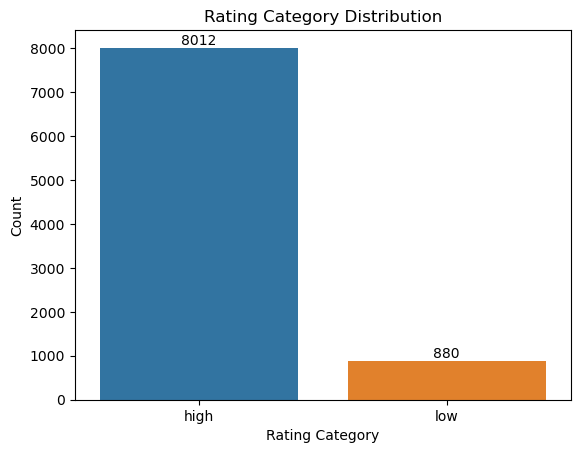

In [13]:
# Checking the distribution of newly created column 'Rating_category'.

ax = sb.countplot(data = df, x = 'Rating_category')
plt.title("Rating Category Distribution")
plt.xlabel("Rating Category")
plt.ylabel("Count")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha = 'center', va = 'bottom')
plt.show()

### Observation

- The distribution is highly imbalanced, with approximately 90% of the ratings categorized as 'high,' suggesting a skewed dataset or a potential bias in the rating system.

In [14]:
# Converting the column 'Reviews' to numeric datatype and Checking the presence of outliers

column = 'Reviews'
def toNumericAndTransform(df, column):
    # Converting the column to numeric
    df[column] = pd.to_numeric(df[column], errors = 'coerce')
    print("Reviews column converted to numeric datatype.")
    
    # Checking the presence of outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f'Number of outliers: {outliers.count()}')
    
    # Handling the outliers using tranformation approach
    df[column] = np.log1p(df[column])
    print("Outliers has been handled using log transformation.")
    
    return df

df = toNumericAndTransform(df, column)   

Reviews column converted to numeric datatype.
Number of outliers: 1555
Outliers has been handled using log transformation.


In [15]:
# Handling the non-numeric data and converting the 'Size' column into suitable datatype.

def sizeConversion(size):
    if 'M' in size: return float(size.replace('M', '').strip()) * 1e6
    elif 'K' in size: return float(size.replace('K', '').strip()) * 1e3
    elif size == 'Varies with device': return np.nan
    else: return np.nan  
    
df['Size'] = df['Size'].apply(sizeConversion)
df.dropna(subset = ['Size'], inplace = True)

In [16]:
# Checking the column 'Installs', handling the the unwanted characters and converting the column into suitable datatype.

col = 'Installs'
def convertInstalls(df, col):
    df[col] = pd.to_numeric(df[col].str.replace(',', '').str.replace('+', ''), errors = 'coerce')
    print(f"{col} column has been handled and converted to suitable datatype.")
    return df

df = convertInstalls(df, col)

Installs column has been handled and converted to suitable datatype.


In [17]:
# Checking the column 'Price', removing the unwanted characters and converting the column into suitable datatype.

coll = 'Price'
def convertPrice(df, coll):
    df[coll] = pd.to_numeric(df[coll].str.replace('$', ''), errors = 'coerce')
    print(f"{coll} column has been handled and converted to suitable datatype.")
    return df

df = convertPrice(df, coll)

Price column has been handled and converted to suitable datatype.


### 3. Data preparation for model building

In [18]:
# Dropping the redundant columns for the analysis.

df.drop(columns = ['App', 'Rating', 'Last Updated', 'Current Ver', 'Android Ver'], inplace = True)

In [19]:
# Replacing 'high' as 1 and 'low' as 0 in Rating category column.

df['Rating_category'] = df['Rating_category'].map({'high': 1, 'low': 0})

In [20]:
# Encoding categorical value

def objToInt(df_series):
    if df_series.dtype == 'object':
        df_series = LabelEncoder().fit_transform(df_series)
    return df_series

dfCopy = df.copy()
encoded_df = dfCopy.apply(lambda x: objToInt(x))
encoded_df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_category
0,0,5.075174,19000000.0,10000,0,0.0,1,9,1
1,0,6.875232,14000000.0,500000,0,0.0,1,11,1
2,0,11.379520,8700000.0,5000000,0,0.0,1,9,1
3,0,12.281389,25000000.0,50000000,0,0.0,4,9,1
4,0,6.875232,2800000.0,100000,0,0.0,1,10,1


In [21]:
# Segregating the target and independent features.

X = encoded_df.drop(columns = ['Rating_category'])
y = encoded_df['Rating_category']

In [22]:
# Splitting the dataset into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [23]:
# Standardizing the data, so that the valuea are within a particular range.

scaler = StandardScaler()
scaled_array = scaler.fit_transform(encoded_df)
scaled_df = pd.DataFrame(scaled_array, columns = encoded_df.columns)
scaled_df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_category
0,-2.033882,-0.712991,-0.193873,-0.171468,-0.27297,-0.061882,-0.471632,-1.581655,0.349964
1,-2.033882,-0.226556,-0.407015,-0.161065,-0.27297,-0.061882,-0.471632,-1.519354,0.349964
2,-2.033882,0.990651,-0.632947,-0.065527,-0.27297,-0.061882,-0.471632,-1.581655,0.349964
3,-2.033882,1.234366,0.061899,0.889858,-0.27297,-0.061882,2.476207,-1.581655,0.349964
4,-2.033882,-0.226556,-0.884455,-0.169558,-0.27297,-0.061882,-0.471632,-1.550505,0.349964


### 4. Model training and testing

In [24]:
# Writing a function to fit and print the model predictions, input parameters would be model, train, and test data.

def fitAndEvaluate(model, X_train, X_test, y_train, y_test):
    
    print("Model Details:")
    print(model)
    print("\nTraining Data (X_train) Shape:", X_train.shape)
    print("Training Labels (y_train) Shape:", y_train.shape)
    print("\nTesting Data (X_test) Shape:", X_test.shape)
    print("Testing Labels (y_test) Shape:", y_test.shape)
    print("\n" + "="*50 + "\n")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f"Model Predictions on Test Data: {y_pred}")
    
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report) 

In [25]:
# Using the above function and training a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models and making predictions on test data and evaluating the models.

models = {
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Bagging': BaggingClassifier(),
            'Boosting': GradientBoostingClassifier(),
            'Stacked Classifier': StackingClassifier(estimators = [
            ('rf', RandomForestClassifier()), 
            ('gb', GradientBoostingClassifier())])
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    fitAndEvaluate(model, X_train, X_test, y_train, y_test)
    print("\n" + "="*50 + "\n")

Model: Decision Tree
Model Details:
DecisionTreeClassifier()

Training Data (X_train) Shape: (5733, 8)
Training Labels (y_train) Shape: (5733,)

Testing Data (X_test) Shape: (1434, 8)
Testing Labels (y_test) Shape: (1434,)


Model Predictions on Test Data: [1 1 1 ... 1 1 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.24      0.20       139
           1       0.92      0.88      0.90      1295

    accuracy                           0.82      1434
   macro avg       0.55      0.56      0.55      1434
weighted avg       0.84      0.82      0.83      1434



Model: Random Forest
Model Details:
RandomForestClassifier()

Training Data (X_train) Shape: (5733, 8)
Training Labels (y_train) Shape: (5733,)

Testing Data (X_test) Shape: (1434, 8)
Testing Labels (y_test) Shape: (1434,)


Model Predictions on Test Data: [1 1 1 ... 0 1 1]

Classification Report:
              precision    recall  f1-score   support

           0      

### 5. Conclusion and improvisation

#### Comparing Models

**1. Decision Tree Classifier:** The model tends to overpredict the majority class (high rating) with high precision and recall for class (1) but performs poorly on class (0).

**2. Random Forest Classifier:** The Random Forest model improves accuracy compared to the Decision Tree, but it still struggles with the minority class (0), showing low recall and precision.

**3. Bagging Classifier:** Bagging offers a more balanced performance than Random Forest, but it still shows a significant bias towards the majority class (1).

**4. Gradient Boosting Classifier:** While Gradient Boosting achieves the highest accuracy, it completely fails to classify the minority class (0), suggesting that it is highly biased.

**5. Stacked Classifier:**  The Stacked Classifier performs slightly better on the minority class (0) than Gradient Boosting, but the improvement is marginal, and the model remains heavily biased towards class (1).


#### Conclusion

- All models demonstrate high accuracy, largely driven by the correct classification of the majority class (1). However, they struggle with classifying the minority class (0). This imbalance leads to poor precision, recall, and F1-scores for class (0), indicating that the models are biased.


#### Future Steps to Improve Model Performance

**1. Address Class Imbalance:**

- **Resampling Techniques:** Appling oversampling methods like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class to balance the dataset.
- **Class Weighting:** Assigning higher weights to the minority class (0) in the models to penalize incorrect classifications.

**2. Feature Engineering:**

- **Interaction Features:** Creating interaction features that may better capture the relationship between input features and the target variable.

**3. Hyperparameter Tuning:**

- **Grid Search or Random Search:** Performing hyperparameter tuning using techniques like Grid Search or Random Search to find the best set of hyperparameters for each model in the prediction.
- **Cross-Validation:** Using cross-validation to evaluate model performance more reliably, ensuring that the results are not dependent on a specific train-test split.

**4. Data Augmentation:**

- **Synthetic Data:** Generating synthetic data points for the minority class to augment the dataset and providing the model with more examples to learn from.